## Linear Regression(선형 회귀)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import my_utils as my

#### 데이터 준비

In [7]:
num = 51

x = np.linspace(0, 10, num)
y = x + np.random.normal(1, 2, num)

<AxesSubplot: >

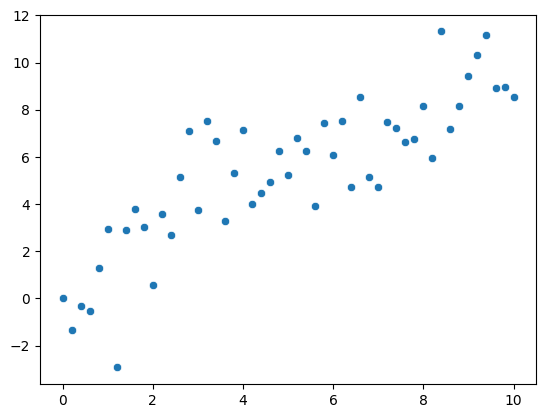

In [8]:
sns.scatterplot(x=x, y=y)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(40,) (11,)
(40,) (11,)


In [15]:
x_train = x_train.reshape(-1, 1)   # LinearRegression의 train 데이터는 2차원 이상이여야 함
x_train.shape

(40, 1)

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)   # y = ax + b 직선에서 a와 b를 찾은 것

LinearRegression()

In [17]:
print(lr.coef_)   # y = ax + b에서 a값
print(lr.intercept_)   # y = ax + b에서 b값

[0.89080623]
1.0445836663079913


In [18]:
y_pred = lr.predict(x_train)

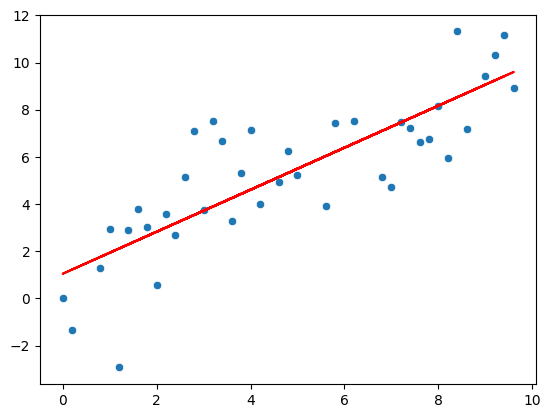

In [22]:
sns.scatterplot(x=x_train.reshape(-1), y=y_train)
plt.plot(x_train.reshape(-1), y_pred, "r")
plt.show()

#### 평가

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE
mse = mean_squared_error(y_train, y_pred)
mse

3.2132049056168186

In [29]:
# RMSE
rmse = np.sqrt(mse)
rmse

1.7925414655222953

In [30]:
# MAE
mae = mean_absolute_error(y_train, y_pred)
mae

1.402338742594302

#### 테스트

In [33]:
y_pred = lr.predict(x_test.reshape(-1, 1))

In [36]:
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE : 1.719350694367845
RMSE : 1.3112401360421533


#### 시각화

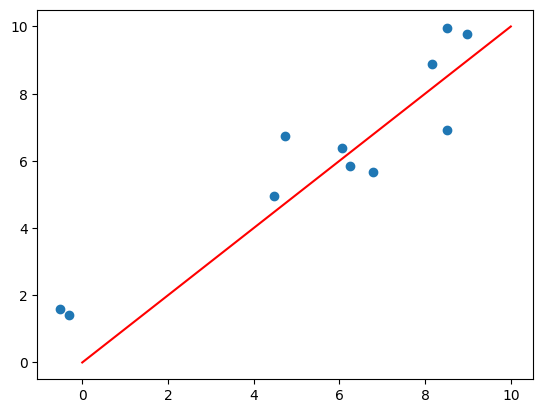

In [39]:
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], "r")
plt.show()   # 빨간색 선에 모든 점이 있다면 정확하게 다 맞춘 것

#### 분류의 score() 리턴은 정확도
#### 회귀의 score() 리턴은 R2로 0 ~ 1 사이의 값